# Libraries installed

# Libraries used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Download and load dataset

The following functions are used to allow users to add their own filepath or URL. Nevertheless, if you don't want to use them, in the next code cell you can find a preloaded file, ready to use.

In [2]:
def download_file(url, filename):
    """
    Download a file from the given URL and save it with the specified filename.

    Parameters:
    - url (str): The URL from which to download the file.
    - filename (str): The name to use when saving the downloaded file.

    Returns:
    None

    Raises:
    - FileNotFoundError: If the file specified by 'filename' is not found after attempting to download.
    - Exception: If an unexpected error occurs during the download process.
    """
    if not(os.path.isfile(filename)):
        print("Downloading file...")

        wget.download(url, filename)
        print(f"Current path: {os.getcwd()}")
        print("Files:")
        print(os.listdir())


def read_file() -> pd.DataFrame:
    """
    Prompt the user for a file path or URL, download the file if it's a URL, and read it into a Pandas DataFrame.

    Returns:
    pd.DataFrame: A DataFrame containing the data from the specified file.

    Raises:
    - pd.errors.ParserError: If there is an issue parsing the file (e.g., incorrect file format).
    - FileNotFoundError: If the specified file is not found.
    - Exception: If an unexpected error occurs during the file reading process.
    """
    while True:
        try:
            file_or_url = input("Enter the file path or URL: ")

            if file_or_url.startswith("http"):
                filename = file_or_url.split("/")[-1] + ".csv"
                download_file(file_or_url, filename)
                return pd.read_csv(filename)

            filename_lowercase = file_or_url.lower()

            if filename_lowercase.endswith('.csv'):
                return pd.read_csv(filename_lowercase)

            if filename_lowercase.endswith(('.xls', '.xlsx')):
                return pd.read_excel(filename_lowercase)

            if filename_lowercase.endswith('.json'):
                return pd.read_json(filename_lowercase)

            print("Unsupported file format. Please provide a CSV, Excel, or JSON file.")

        except pd.errors.ParserError:
            print("Error: Unable to parse the file. Please check the file format.")
        except FileNotFoundError:
            print("Error: File not found. Please enter a valid file path or URL.")
        except Exception as e:
            print(f"An error occurred: {e}")

# link_data:
# https://gist.githubusercontent.com/fgiorgia/01023ab74d741a12125fd725e5e8da2a/raw/e7a8dcaad69c103f2831fd967de09c61e805b7ff/sales_raw_data_redi

#df = read_file()
#print(df)


Here is the preloaded file

In [3]:
__DATASET_URL__ = "https://docs.google.com/spreadsheets/d/1lWFIL7h0F7xtmJHNPJX7ttPkO4v9j3xQ2E9Qb1wjek4/export?format=csv&id=1lWFIL7h0F7xtmJHNPJX7ttPkO4v9j3xQ2E9Qb1wjek4&gid=1240299773"

df = pd.read_csv(__DATASET_URL__)

print("\nHead:\n")
print(df.head())


Head:

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social m

In [4]:
# Show all column names
print("\nColumn names:\n")
print(df.columns)



Column names:

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the pre

In [5]:
df.rename(
    columns={
        '1. What is your age?': 'age', 
        '2. Gender': 'sex',
        '3. Relationship Status': 'relationship_status', 
        '4. Occupation Status': 'occupation',
        '5. What type of organizations are you affiliated with?': 'affiliated_organization',
        '6. Do you use social media?': 'social_media_user',
        '7. What social media platforms do you commonly use?': 'common_platforms_used',
        '8. What is the average time you spend on social media every day?': 'average_hours_spent_daily',
        '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_use_without_purpose',
        '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_distracted',
        "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
        '12. On a scale of 1 to 5, how easily distracted are you?': 'easily_distracted',
        '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worried level',
        '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
        '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'frequency_comparing_with_others',
        '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feeling_comparing_with_others',
        '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
        '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
        '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'frequency_fluctuating_interest',
        '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'frequency_sleep_issues',
        }, 
    inplace=True)

df

,Timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,restless_without_social_media,easily_distracted,worried level,difficulty_concentrating,frequency_comparing_with_others,feeling_comparing_with_others,frequency_seeking_validation,frequency_feeling_depressed,frequency_fluctuating_interest,frequency_sleep_issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [6]:
df.columns

Index(['Timestamp', 'age', 'sex', 'relationship_status', 'occupation',
       'affiliated_organization', 'social_media_user', 'common_platforms_used',
       'average_hours_spent_daily', 'frequency_use_without_purpose',
       'frequency_distracted', 'restless_without_social_media',
       'easily_distracted', 'worried level', 'difficulty_concentrating',
       'frequency_comparing_with_others', 'feeling_comparing_with_others',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'frequency_fluctuating_interest', 'frequency_sleep_issues'],
      dtype='object')

# Columns Description
**Complete attribute documentation:**

* **Timestamp**: Date and time of data entry
* **age**: Participant's age
* **sex**: Participant's gender
* **relationship_status**: Current relationship status
* **occupation**: Participant's current occupation status
* **affiliated_organization**: Affiliation with any specific organization
* **social_media_user**: Whether the participant uses social media
* **common_platforms_used**: Social media platforms commonly used
* **average_hours_spent_daily**: Average hours spent on social media daily
* **frequency_use_without_purpose**: How often social media is used without a specific purpose
* **frequency_distracted**: Frequency of feeling distracted by social media
* **restless_without_social_media**: Frequency of restlessness when not using social media for a while
* **easily_distracted**: Frequency of being easily distracted
* **worried level**: How much one is bothered by worries
* **difficulty_concentrating**: Level of difficulty concentrating on tasks
* **frequency_comparing_with_others**: How often the participant compares themselves with successful people on social media
* **feeling_comparing_with_others**: Emotional impact of comparing self with others on social media
* **frequency_seeking_validation**: How often the participant seeks validation on social media
* **frequency_feeling_depressed**: How often the participant feels depressed or down
* **frequency_fluctuating_interest**: How often interests in daily activities fluctuate
* **frequency_sleep_issues**: How often social media usage affects sleep patterns

# Exploring data

In [7]:
print("\nShape:")
print(df.shape)


Shape:
(481, 21)


Check the data types of each column and the number of non-null values

In [8]:
print("\nInfo:\n")
print(df.info())  


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        481 non-null    object 
 1   age                              481 non-null    float64
 2   sex                              481 non-null    object 
 3   relationship_status              481 non-null    object 
 4   occupation                       481 non-null    object 
 5   affiliated_organization          451 non-null    object 
 6   social_media_user                481 non-null    object 
 7   common_platforms_used            481 non-null    object 
 8   average_hours_spent_daily        481 non-null    object 
 9   frequency_use_without_purpose    481 non-null    int64  
 10  frequency_distracted             481 non-null    int64  
 11  restless_without_social_media    481 non-null    int64  
 12  easily_distrac

## Standardize Data Formats
Rectify the data type discrepancy in the 'age' column, currently detected as float64 

In [9]:
# Convert the 'age' column to integer
df['age'] = df['age'].astype(int)

## Proportion of missing data
We're interested in the proportion of missing values to assess the overall data quality and make informed decisions regarding data imputation and feature engineering.

In [10]:
df.isnull().sum()

Timestamp                           0
age                                 0
sex                                 0
relationship_status                 0
occupation                          0
affiliated_organization            30
social_media_user                   0
common_platforms_used               0
average_hours_spent_daily           0
frequency_use_without_purpose       0
frequency_distracted                0
restless_without_social_media       0
easily_distracted                   0
worried level                       0
difficulty_concentrating            0
frequency_comparing_with_others     0
feeling_comparing_with_others       0
frequency_seeking_validation        0
frequency_feeling_depressed         0
frequency_fluctuating_interest      0
frequency_sleep_issues              0
dtype: int64

In [11]:
prop_miss_values = round(df.isna().mean() * 100, 2)

print("\nProportion of missing values:\n")
print(prop_miss_values)


Proportion of missing values:

Timestamp                          0.00
age                                0.00
sex                                0.00
relationship_status                0.00
occupation                         0.00
affiliated_organization            6.24
social_media_user                  0.00
common_platforms_used              0.00
average_hours_spent_daily          0.00
frequency_use_without_purpose      0.00
frequency_distracted               0.00
restless_without_social_media      0.00
easily_distracted                  0.00
worried level                      0.00
difficulty_concentrating           0.00
frequency_comparing_with_others    0.00
feeling_comparing_with_others      0.00
frequency_seeking_validation       0.00
frequency_feeling_depressed        0.00
frequency_fluctuating_interest     0.00
frequency_sleep_issues             0.00
dtype: float64


Drop rows and columns that are entirely NA, if any

In [12]:
df.dropna(how='all')
df.dropna(axis=1, how='all')

,Timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,restless_without_social_media,easily_distracted,worried level,difficulty_concentrating,frequency_comparing_with_others,feeling_comparing_with_others,frequency_seeking_validation,frequency_feeling_depressed,frequency_fluctuating_interest,frequency_sleep_issues
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


### Distribution of null values


In [13]:
retired_students_null_affiliated = df[(df['occupation'].str.contains('Retired|Student', case=False)) 
                          & df['affiliated_organization'].isna()]
print(f"When occupation contains 'retired' or 'student' and affiliated_organization is null: "
    f"{retired_students_null_affiliated.shape[0]}/{df['affiliated_organization'].isna().sum()}")

retired_students_notnull_affiliated = df[df['occupation'].str.contains('Retired|Student', case=False) 
                             & df['affiliated_organization'].notna()]
print(f"When occupation contains 'retired' or 'student' and affiliated_organization is not null: "
    f"{retired_students_notnull_affiliated.shape[0]}")


When occupation contains 'retired' or 'student' and affiliated_organization is null: 22/30
When occupation contains 'retired' or 'student' and affiliated_organization is not null: 327


In [14]:
data = {
    'Occupation': ['Retired/Student', 'Retired/Student'],
    'Affiliated Organization': ['Null', 'Not Null'],
    'Count': [retired_students_null_affiliated.shape[0], retired_students_notnull_affiliated.shape[0]]
}

df_info = pd.DataFrame(data)
df_info


,Occupation,Affiliated Organization,Count
0,Retired/Student,Null,22
1,Retired/Student,Not Null,327


In [15]:
df.loc[(df['occupation'] == 'University Student') 
       & df['affiliated_organization'].isna(), 'affiliated_organization'] = 'University'

df.loc[(df['occupation'] == 'School Student') 
       & df['affiliated_organization'].isna(), 'affiliated_organization'] = 'School'

df.loc[(df['occupation'] == 'Salaried Worker') 
       & df['affiliated_organization'].isna(), 'affiliated_organization'] = 'Private'

df.isnull().sum()

Timestamp                          0
age                                0
sex                                0
relationship_status                0
occupation                         0
affiliated_organization            5
social_media_user                  0
common_platforms_used              0
average_hours_spent_daily          0
frequency_use_without_purpose      0
frequency_distracted               0
restless_without_social_media      0
easily_distracted                  0
worried level                      0
difficulty_concentrating           0
frequency_comparing_with_others    0
feeling_comparing_with_others      0
frequency_seeking_validation       0
frequency_feeling_depressed        0
frequency_fluctuating_interest     0
frequency_sleep_issues             0
dtype: int64

In [16]:
null_affiliated = df[df['affiliated_organization'].isna()]

# Show the rows where affiliated_organization is still null
null_affiliated

,Timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,restless_without_social_media,easily_distracted,worried level,difficulty_concentrating,frequency_comparing_with_others,feeling_comparing_with_others,frequency_seeking_validation,frequency_feeling_depressed,frequency_fluctuating_interest,frequency_sleep_issues
42,4/18/2022 21:48:07,56,Female,Married,Retired,NaN,Yes,YouTube,Between 1 and 2 hours,1,...,1,1,3,1,1,3,1,2,3,1
74,4/19/2022 1:16:34,23,Female,Single,Retired,NaN,Yes,"Facebook, YouTube, Discord, Reddit",Between 4 and 5 hours,4,...,3,3,4,5,3,2,4,5,5,4
162,4/20/2022 2:07:23,48,Female,Married,Retired,NaN,Yes,"Facebook, Instagram, YouTube, Pinterest, TikTok",More than 5 hours,4,...,5,5,4,5,3,3,2,3,5,4
428,5/12/2022 23:13:03,30,Female,Married,Retired,NaN,Yes,"Facebook, Instagram, YouTube",Between 3 and 4 hours,1,...,1,2,3,3,2,4,3,3,3,2
453,5/13/2022 19:48:20,60,Male,Single,Retired,NaN,Yes,"Facebook, YouTube",Between 2 and 3 hours,1,...,1,1,1,1,3,3,3,1,1,1


In [17]:
unique_occupations = df['occupation'].unique()
unique_affiliated_organizations = df['affiliated_organization'].unique()

print("Unique Occupations:")
print(unique_occupations)

print("\nUnique Affiliated Organizations:")
print(unique_affiliated_organizations)


Unique Occupations:
['University Student' 'School Student' 'Salaried Worker' 'Retired']

Unique Affiliated Organizations:
['University' 'Private' 'School' 'School, University' 'Company'
 'School, Private' 'University, Company' nan 'Goverment'
 'Company, Private' 'University, Goverment, Private'
 'University, Company, Private' 'University, Private' 'University, N/A'
 'School, University, Private' 'University, Goverment'
 'University, Company, Goverment' 'School, Company' 'School, N/A']


In [18]:
# Split the affiliated_organization column by comma and create binary columns
affiliated_organization_dummies = df['affiliated_organization'].str.get_dummies(', ')

# Select only the columns for the specified categories
categories = ['University', 'Private', 'School', 'Company', 'Goverment']
affiliated_organization_dummies = affiliated_organization_dummies[categories]

# Concatenate the original DataFrame with the new binary columns
df = pd.concat([df, affiliated_organization_dummies], axis=1)

df

,Timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,average_hours_spent_daily,frequency_use_without_purpose,...,feeling_comparing_with_others,frequency_seeking_validation,frequency_feeling_depressed,frequency_fluctuating_interest,frequency_sleep_issues,University,Private,School,Company,Goverment
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,3,2,5,4,5,1,0,0,0,0
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,1,1,5,4,5,1,0,0,0,0
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,3,1,4,2,5,1,0,0,0,0
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,2,4,3,2,1,0,0,0,0
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,3,4,4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,2,4,3,4,4,1,1,0,0,0
477,5/22/2022 0:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,4,4,4,1,1,0,0,0,0
478,5/22/2022 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,3,4,2,2,2,1,0,0,0,0
479,7/14/2022 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,3,4,4,5,4,1,0,0,0,0


In [19]:
df.describe()

,age,frequency_use_without_purpose,frequency_distracted,restless_without_social_media,easily_distracted,worried level,difficulty_concentrating,frequency_comparing_with_others,feeling_comparing_with_others,frequency_seeking_validation,frequency_feeling_depressed,frequency_fluctuating_interest,frequency_sleep_issues,University,Private,School,Company,Goverment
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.135135,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663,0.646570,0.212058,0.139293,0.133056,0.020790
std,9.915079,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619,0.478533,0.409191,0.346613,0.339989,0.142829
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for outliers

In [20]:
numerical_columns = list(df.loc[:,['age', 
                                   'restless_without_social_media', 
                                   'difficulty_concentrating', 
                                   'feeling_comparing_with_others',
                                   'frequency_use_without_purpose', 
                                   'frequency_distracted', 
                                   'easily_distracted', 
                                   'worried level', 
                                   'frequency_comparing_with_others', 
                                   'frequency_seeking_validation', 
                                   'frequency_feeling_depressed', 
                                   'frequency_fluctuating_interest', 
                                   'frequency_sleep_issues', 
                                   'University', 
                                   'Private', 
                                   'School', 
                                   'Company', 
                                   'Goverment']])

categorical_columns = list(df.loc[:,['Timestamp', 
                                     'sex', 
                                     'relationship_status', 
                                     'occupation', 
                                     'affiliated_organization', 
                                     'social_media_user', 
                                     'common_platforms_used', 
                                     'average_hours_spent_daily']])

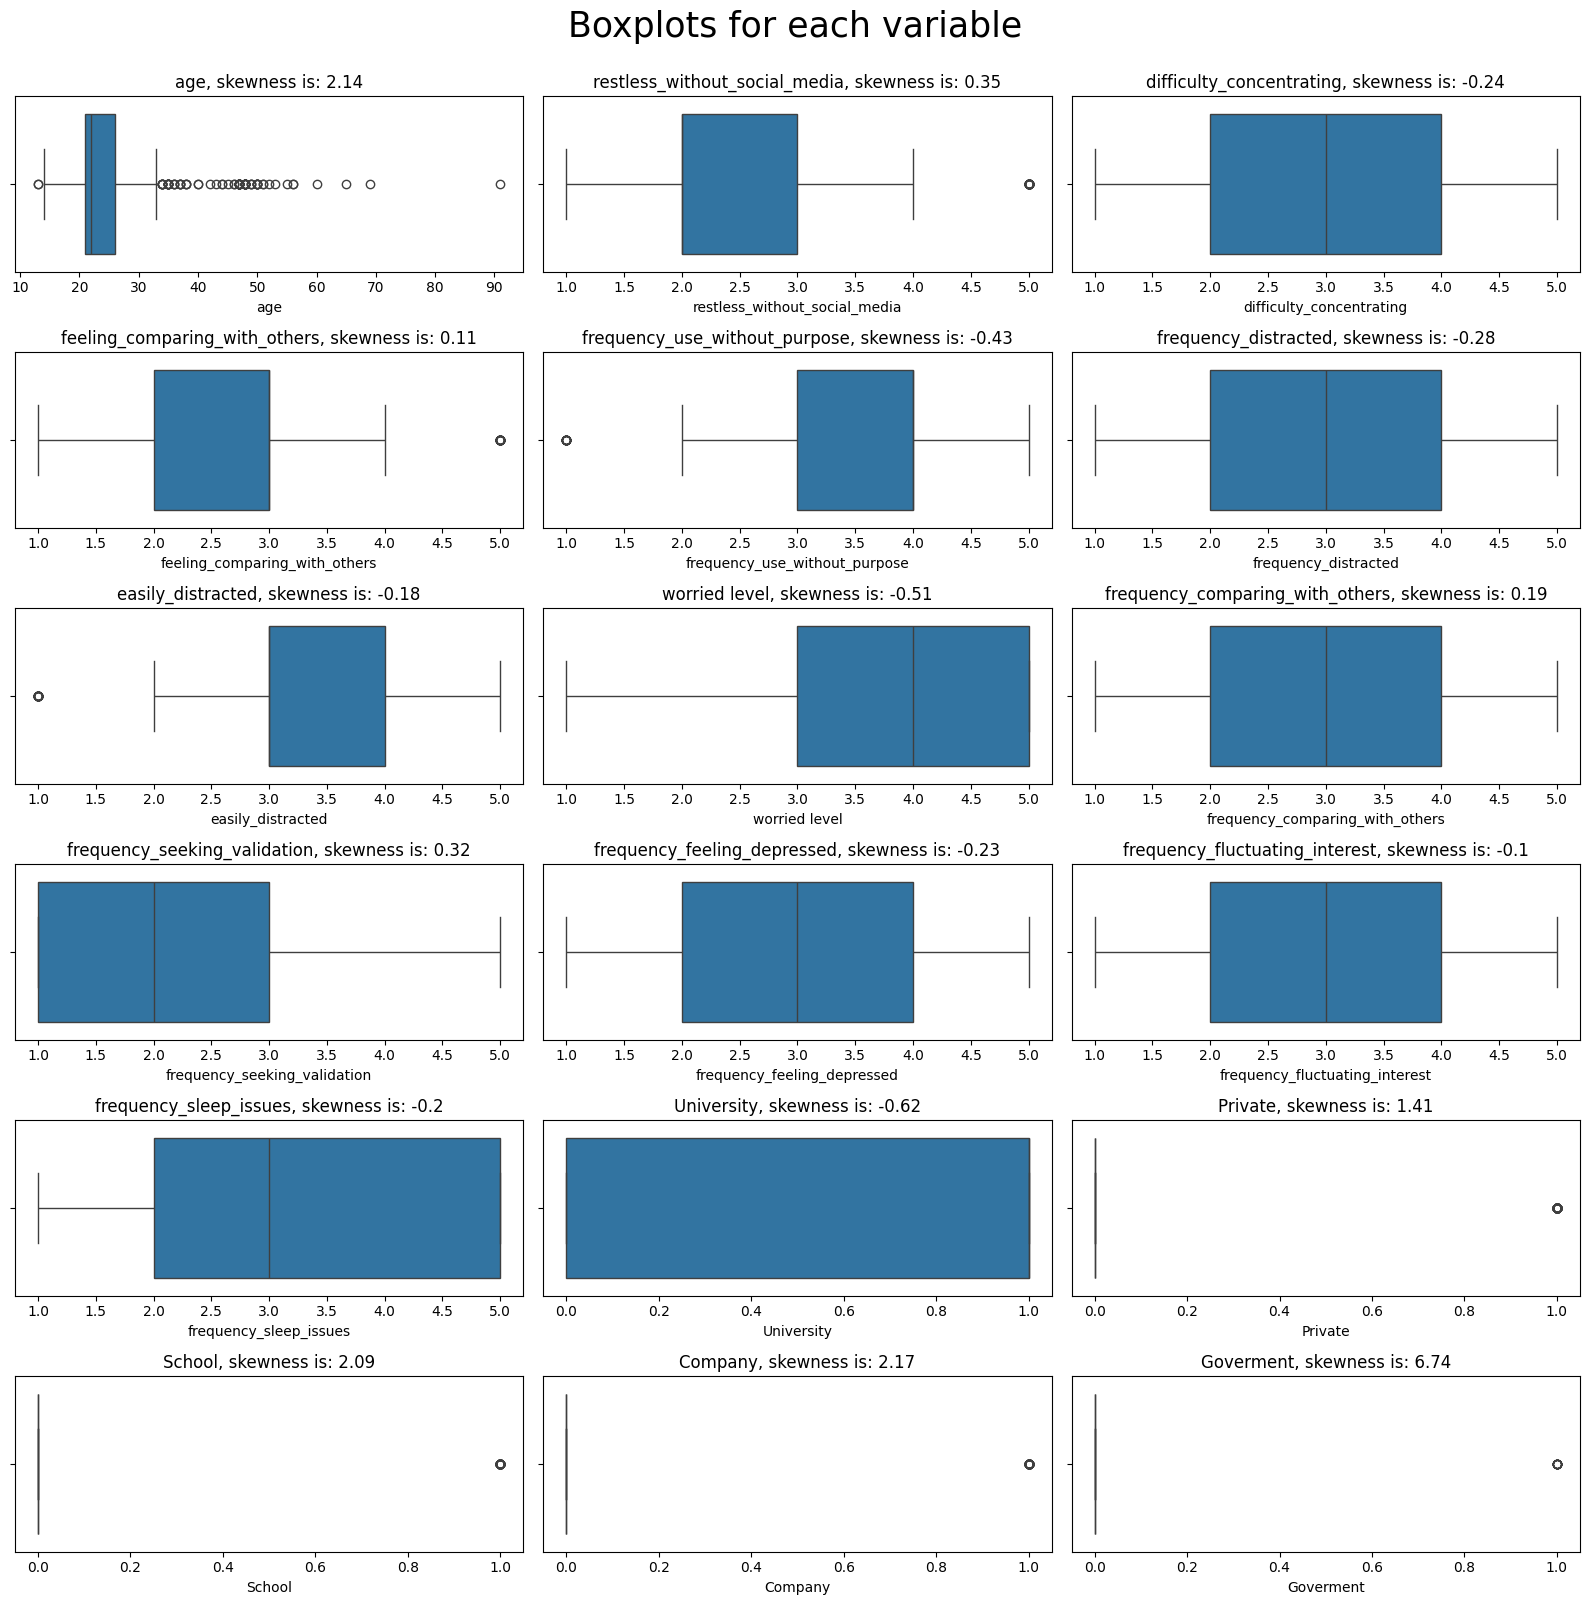

In [21]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i < len(axs):
            sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
            axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis=0, skipna=True), 2)))
        else:
            break

    plt.subplots_adjust(top=0.9, hspace=0.9)  # Adjust the top spacing and horizontal spacing between subplots

boxplots_custom(dataset=df, columns_list=numerical_columns, rows=6, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()


**age**:
The skewness of 2.14 for the 'age' variable indicates a positive skew or right skew in the data. This means that there are a number of individuals who are older than the average age and those are significantly different from the rest of the group. This indicates that the age distribution is not normal.

<Axes: >

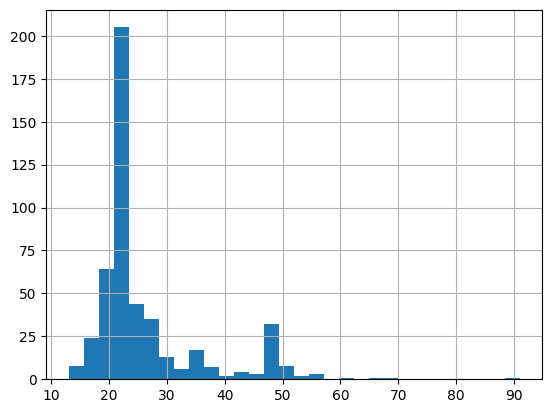

In [22]:
# Age distribution
df['age'].hist(bins=30)